In [38]:
import os
import matplotlib.pyplot as plt
import torch.nn as nn           # for creating  neural networks
from torch.utils.data import DataLoader # for dataloaders 
from PIL import Image           # for checking images
import torch.nn.functional as F # for functions for calculating loss
import torchvision.transforms as transforms   # for transforming images into tensors 
from torchvision.utils import make_grid       # for data checking
from torchvision.datasets import ImageFolder  # for working with classes and images
from torchsummary import summary              # for getting the summary of our model

In [75]:
data_dir =r"C:/Users/admin/Desktop/niladri/project/plant_diseases/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)"
train_dir = data_dir + "/train"
valid_dir = data_dir + "/valid"
diseases = os.listdir(train_dir)

In [5]:
print(diseases)

['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___healthy', 'Corn_(maize)___Northern_Leaf_Blight', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___healthy', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___healthy', 'Potato___Late_blight', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___healthy', 'Strawberry___Leaf_scorch', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___healthy', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite',

In [7]:
print("Total disease classes are: {}".format(len(diseases)))

Total disease classes are: 38


In [9]:
plants = []
NumberOfDiseases = 0
for plant in diseases:
    if plant.split('___')[0] not in plants:
        plants.append(plant.split('___')[0])
    if plant.split('___')[1] != 'healthy':
        NumberOfDiseases += 1

In [11]:
# unique plants in the dataset
print(f"Unique Plants are: \n{plants}")

Unique Plants are: 
['Apple', 'Blueberry', 'Cherry_(including_sour)', 'Corn_(maize)', 'Grape', 'Orange', 'Peach', 'Pepper,_bell', 'Potato', 'Raspberry', 'Soybean', 'Squash', 'Strawberry', 'Tomato']


In [13]:
# number of unique plants
print("Number of plants: {}".format(len(plants)))

Number of plants: 14


In [15]:
# number of unique diseases
print("Number of diseases: {}".format(NumberOfDiseases))

Number of diseases: 26


In [23]:

# Get the list of all training files
train_files = os.listdir(train_dir)

# Number of images for each disease
nums = {}

# Iterate through all training files
for file_name in train_files:
    # Extract the disease category from the filename
    # Assuming the format is "Plant___Disease_something.jpg"
    category = file_name.split("___")[0]  # This extracts the part before the first '___'
    
    # Count the occurrences of each disease category
    if category in nums:
        nums[category] += 1
    else:
        nums[category] = 1

# Convert the nums dictionary to a pandas DataFrame
img_per_class = pd.DataFrame(list(nums.values()), index=nums.keys(), columns=["no. of fruits"])

# Display the result
print(img_per_class)

                         no. of fruits
Apple                                4
Blueberry                            1
Cherry_(including_sour)              2
Corn_(maize)                         4
Grape                                4
Orange                               1
Peach                                2
Pepper,_bell                         2
Potato                               3
Raspberry                            1
Soybean                              1
Squash                               1
Strawberry                           2
Tomato                              10


In [25]:
# Number of images for each disease
nums = {}
for disease in diseases:
    nums[disease] = len(os.listdir(train_dir + '/' + disease))
    
# converting the nums dictionary to pandas dataframe passing index as plant name and number of images as column

img_per_class = pd.DataFrame(nums.values(), index=nums.keys(), columns=["no. of images"])
img_per_class

,no. of images
Apple___Apple_scab,2016
Apple___Black_rot,1987
Apple___Cedar_apple_rust,1760
Apple___healthy,2008
Blueberry___healthy,1816
Cherry_(including_sour)___healthy,1826
Cherry_(including_sour)___Powdery_mildew,1683
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot,1590
Corn_(maize)___Common_rust_,1907
Corn_(maize)___healthy,1859


Text(0.5, 1.0, 'Images per each class of plant disease')

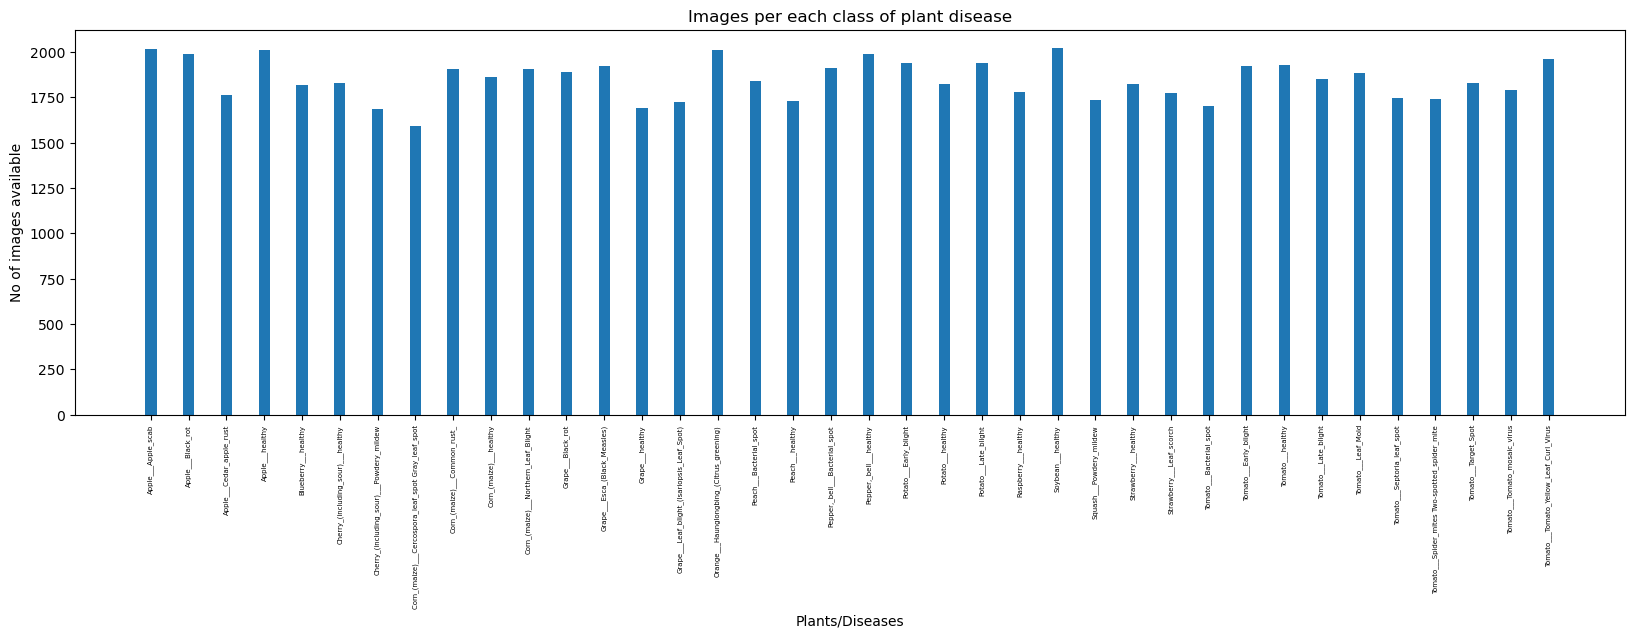

In [31]:
# plotting number of images available for each disease
index = [n for n in range(38)]
plt.figure(figsize=(20, 5))
plt.bar(index, [n for n in nums.values()], width=0.3)
plt.xlabel('Plants/Diseases', fontsize=10)
plt.ylabel('No of images available', fontsize=10)
plt.xticks(index, diseases, fontsize=5, rotation=90)
plt.title('Images per each class of plant disease')

In [33]:
n_train = 0
for value in nums.values():
    n_train += value
print(f"There are {n_train} images for training")

There are 70243 images for training


In [40]:
# datasets for validation and training
train = ImageFolder(train_dir, transform=transforms.ToTensor())
valid = ImageFolder(valid_dir, transform=transforms.ToTensor()) 

In [42]:
img, label = train[0]
print(img.shape, label)

torch.Size([3, 256, 256]) 0


In [44]:
# total number of classes in train set
len(train.classes)

38

In [46]:
# for checking some images from training dataset
def show_image(image, label):
    print("Label :" + train.classes[label] + "(" + str(label) + ")")
    plt.imshow(image.permute(1, 2, 0))

Label :Apple___Apple_scab(0)


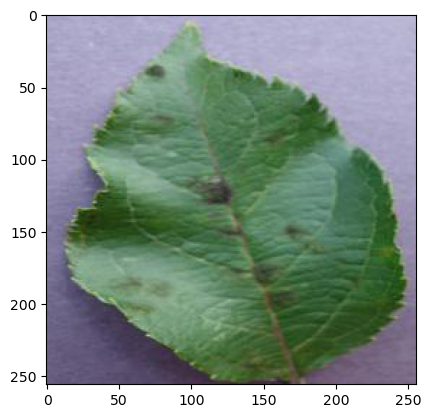

In [48]:
show_image(*train[0])

Label :Tomato___healthy(37)


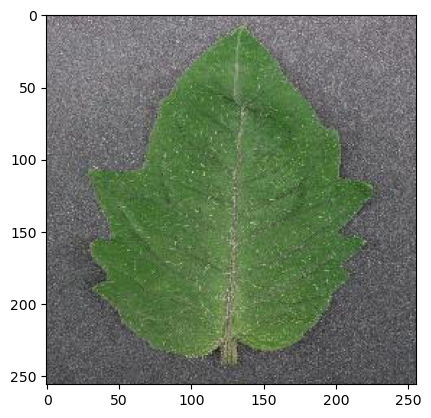

In [50]:
show_image(*train[70000])

Label :Peach___Bacterial_spot(16)


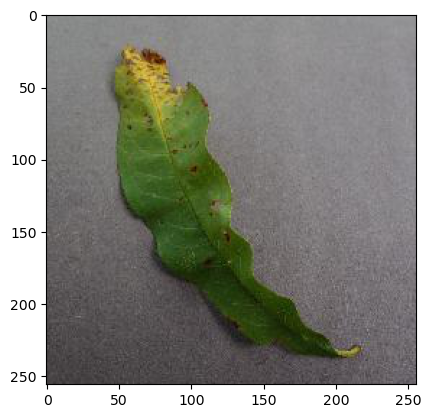

In [52]:
show_image(*train[30000])

Label :Apple___Apple_scab(0)


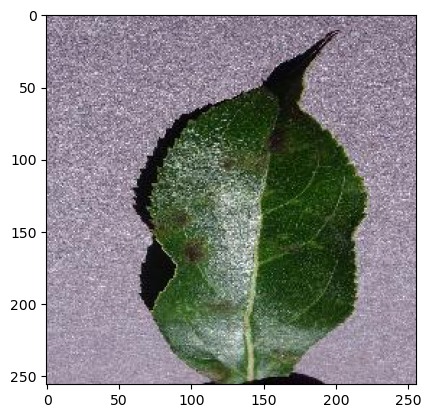

In [56]:
show_image(*train[500])

# Model

In [90]:
import os
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score, f1_score
from tensorflow.keras.callbacks import ModelCheckpoint

In [92]:
# Define the Squeeze-and-Excitation (SE) block
class SEBlock(tf.keras.layers.Layer):
    def __init__(self, in_channels, reduction=16):
        super(SEBlock, self).__init__()
        self.fc1 = layers.Conv2D(in_channels // reduction, kernel_size=1)
        self.fc2 = layers.Conv2D(in_channels, kernel_size=1)
        self.sigmoid = layers.Activation('sigmoid')

    def call(self, x):
        # Squeeze: global average pooling
        y = tf.reduce_mean(x, axis=[1, 2], keepdims=True)  # Global Average Pooling
        y = self.fc1(y)
        y = self.fc2(y)
        y = self.sigmoid(y)
        return x * y  # Scale the input by the attention weights


In [94]:
# Define the main CNN model architecture
def create_model(num_classes=38):
    inputs = layers.Input(shape=(256, 256, 3))

    # Initial Conv layers
    x = layers.Conv2D(64, kernel_size=3, padding='same', activation='relu')(inputs)
    x = layers.Conv2D(128, kernel_size=3, padding='same', activation='relu')(x)
    x = layers.Conv2D(256, kernel_size=3, padding='same', activation='relu')(x)
    x = layers.Conv2D(64, kernel_size=3, padding='same', activation='relu')(x)

    # Multiple Convolutions with different kernel sizes
    x1 = layers.Conv2D(64, kernel_size=5, padding='same', activation='relu')(x)
    x2 = layers.Conv2D(64, kernel_size=7, padding='same', activation='relu')(x)
    x3 = layers.Conv2D(64, kernel_size=9, padding='same', activation='relu')(x)
    
    # Combine the feature maps (sum them)
    x = layers.Add()([x1, x2, x3])

    # Global Average Pooling
    x = layers.GlobalAveragePooling2D()(x)

    # First part of the SE block
    x = layers.Reshape((1, 1, 64))(x)
    x = SEBlock(64)(x)

    # Flatten and classify
    x = layers.Flatten()(x)
    x = layers.Dense(num_classes, activation='softmax')(x)

    model = models.Model(inputs, x)
    return model

In [96]:
data_dir =r"C:/Users/admin/Desktop/niladri/project/plant_diseases/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)"
train_dir = data_dir + "/train"
val_dir = data_dir + "/valid"

In [98]:
# ImageDataGenerator for data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical'
)

Found 70243 images belonging to 38 classes.
Found 17557 images belonging to 38 classes.


In [100]:
# Model creation and compilation
model = create_model(num_classes=38)
model.compile(optimizer=optimizers.Adam(learning_rate=0.001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Print the model summary (detailed architecture)
print("\nModel Architecture and Parameters:")
model.summary()



Model Architecture and Parameters:


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 256, 256,  │      1,792 │ input_layer[0][0] │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 256, 256,  │     73,856 │ conv2d[0][0]      │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 256, 256,  │    295,168 │ conv2d_1[0][0]    │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 256, 256,  │    147,520 │ conv2d_2[0][0]    │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 256, 256,  │    102,464 │ conv2d_3[0][0]    │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 256, 256,  │    200,768 │ conv2d_3[0][0]    │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 256, 256,  │    331,840 │ conv2d_3[0][0]    │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 256, 256,  │          0 │ conv2d_4[0][0],   │
│                     │ 64)               │            │ conv2d_5[0][0],   │
│                     │                   │            │ conv2d_6[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 64)        │          0 │ add[0][0]         │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape (Reshape)   │ (None, 1, 1, 64)  │          0 │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ se_block (SEBlock)  │ (None, 1, 1, 64)  │        580 │ reshape[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 64)        │          0 │ se_block[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 38)        │      2,470 │ flatten[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,156,458 (4.41 MB)

 Trainable params: 1,156,458 (4.41 MB)

 Non-trainable params: 0 (0.00 B)

In [102]:
# Model training with 10 epochs
epochs = 10
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=epochs,
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size
)

C:\Users\admin\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
2195/2195 ━━━━━━━━━━━━━━━━━━━━ 14783s 7s/step - accuracy: 0.1474 - loss: 3.0795 - val_accuracy: 0.4557 - val_loss: 1.9082
Epoch 2/10
   1/2195 ━━━━━━━━━━━━━━━━━━━━ 3:54:40 6s/step - accuracy: 0.4375 - loss: 1.6268

C:\ProgramData\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


2195/2195 ━━━━━━━━━━━━━━━━━━━━ 8s 610us/step - accuracy: 0.4375 - loss: 1.6268 - val_accuracy: 0.3810 - val_loss: 2.1946
Epoch 3/10
2195/2195 ━━━━━━━━━━━━━━━━━━━━ 14767s 7s/step - accuracy: 0.5751 - loss: 1.3975 - val_accuracy: 0.6888 - val_loss: 1.0321
Epoch 4/10
2195/2195 ━━━━━━━━━━━━━━━━━━━━ 8s 565us/step - accuracy: 0.7500 - loss: 0.9591 - val_accuracy: 0.6190 - val_loss: 0.9936
Epoch 5/10
2195/2195 ━━━━━━━━━━━━━━━━━━━━ 14776s 7s/step - accuracy: 0.7285 - loss: 0.8752 - val_accuracy: 0.7941 - val_loss: 0.7089
Epoch 6/10
2195/2195 ━━━━━━━━━━━━━━━━━━━━ 7s 559us/step - accuracy: 0.8438 - loss: 0.4753 - val_accuracy: 0.8095 - val_loss: 0.4458
Epoch 7/10
2195/2195 ━━━━━━━━━━━━━━━━━━━━ 14775s 7s/step - accuracy: 0.7956 - loss: 0.6534 - val_accuracy: 0.8248 - val_loss: 0.5777
Epoch 8/10
2195/2195 ━━━━━━━━━━━━━━━━━━━━ 8s 553us/step - accuracy: 0.8125 - loss: 0.6353 - val_accuracy: 0.6667 - val_loss: 1.5201
Epoch 9/10
2195/2195 ━━━━━━━━━━━━━━━━━━━━ 14790s 7s/step - accuracy: 0.8287 - loss: 

In [103]:
# Save the model
model.save('final_model.h5')

In [104]:
# Plot Loss and Accuracy
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

Text(0.5, 1.0, 'Loss vs Epochs')

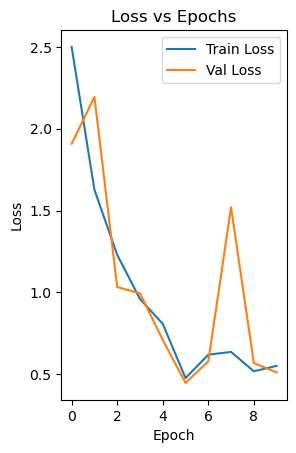

In [105]:
# Plot Training & Validation Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss vs Epochs')

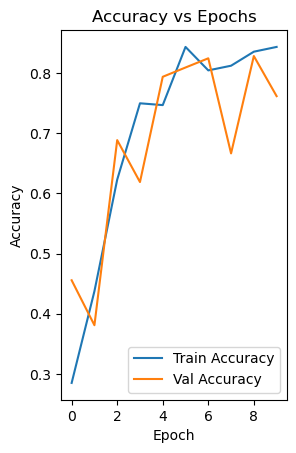

In [106]:
# Plot Training & Validation Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy vs Epochs')

plt.show()

In [107]:
# Evaluate the model on the validation set
val_loss, val_acc = model.evaluate(val_generator)
print(f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_acc:.4f}")

549/549 ━━━━━━━━━━━━━━━━━━━━ 1041s 2s/step - accuracy: 0.8269 - loss: 0.5730
Validation Loss: 0.5595, Validation Accuracy: 0.8300


In [128]:
# Test the model on some images
test_images = ['C:/Users/admin/Desktop/niladri/project/plant_diseases/test/test/PotatoEarlyBlight4.jpg','C:/Users/admin/Desktop/niladri/project/plant_diseases/test/test/TomatoEarlyBlight2.jpg','C:/Users/admin/Desktop/niladri/project/plant_diseases/test/test/AppleCedarRust1.jpg']  # Replace with paths to your test images
test_datagen = ImageDataGenerator(rescale=1./255)

In [130]:
for image_path in test_images:
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(256, 256))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = test_datagen.standardize(img_array)  # Apply the same normalization
    
    # Make prediction
    predictions = model.predict(img_array)
    predicted_class = tf.argmax(predictions, axis=1).numpy()[0]
    class_labels = list(train_generator.class_indices.keys())  # Convert dict_keys to a list
    print(f"Predicted class for {image_path}: {class_labels[predicted_class]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
Predicted class for C:/Users/admin/Desktop/niladri/project/plant_diseases/test/test/PotatoEarlyBlight4.jpg: Potato___Early_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
Predicted class for C:/Users/admin/Desktop/niladri/project/plant_diseases/test/test/TomatoEarlyBlight2.jpg: Tomato___Early_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
Predicted class for C:/Users/admin/Desktop/niladri/project/plant_diseases/test/test/AppleCedarRust1.jpg: Apple___Cedar_apple_rust
